Baseline MAE: 11.28
Baseline RMSE: 31.06
Baseline R²: -0.01
Advanced Model MAE: 4.47
Advanced Model RMSE: 14.19
Advanced R²: 0.79


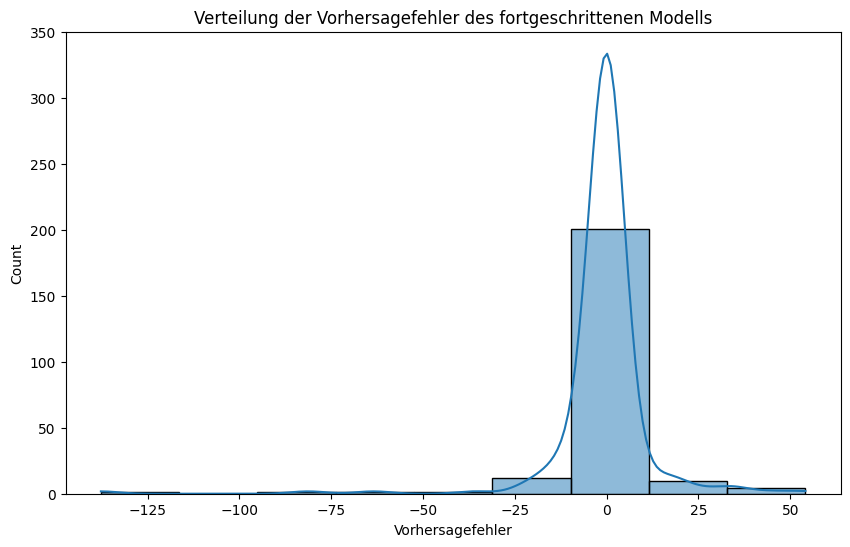

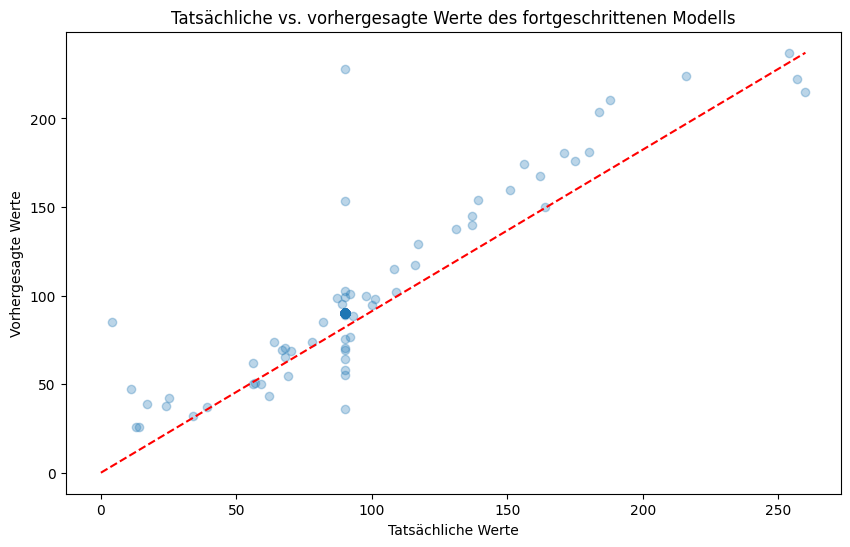

In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file_path):
    """Lädt die Daten aus einer CSV-Datei."""
    return pd.read_csv(file_path)

def load_splits(X_train_path, X_test_path, y_train_path, y_test_path):
    """Lädt die gespeicherten Trainings- und Testdaten."""
    X_train = pd.read_csv(X_train_path)
    X_test = pd.read_csv(X_test_path)
    y_train = pd.read_csv(y_train_path).values.ravel()  # ravel() konvertiert DataFrame in 1D-Array
    y_test = pd.read_csv(y_test_path).values.ravel()
    return X_train, X_test, y_train, y_test

def load_model(model_path):
    """Lädt ein gespeichertes Modell."""
    return joblib.load(model_path)

def evaluate_model(model, X_test, y_test):
    """Bewertet das Modell und gibt MAE und RMSE zurück."""
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions) 
    return mae, rmse, r2, predictions

def plot_errors(y_test, predictions, model_name):
    """Visualisiert die Fehlerverteilung und den Scatterplot der Vorhersagen."""
    errors = y_test - predictions

    plt.figure(figsize=(10, 6))
    sns.histplot(errors, kde=True)
    plt.xlabel("Vorhersagefehler")
    plt.title(f"Verteilung der Vorhersagefehler des {model_name}")
    plt.savefig(r"..\visualizations\Verteilung der Vorhersagefehler des des fortgeschrittenen Modells.png")
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions, alpha=0.3)
    plt.plot([0, max(y_test)], [0, max(predictions)], color='red', linestyle='--')
    plt.xlabel("Tatsächliche Werte")
    plt.ylabel("Vorhergesagte Werte")
    plt.title(f"Tatsächliche vs. vorhergesagte Werte des {model_name}")
    plt.savefig(r"..\visualizations\Tatsächliche vs. vorhergesagte Werte des fortgeschrittenen Modells.png")
    plt.show()

def main():
    # Dateipfade
    input_file_path = r"..\data\processed_data\preprocessed_data.csv"
    baseline_model_path = r"..\models\baseline_model.pkl"
    advanced_model_path = r"..\models\fortgeschrittenes_model.pkl"
    
    # Pfade zu den gespeicherten Trainings- und Testdatensätzen
    X_train_path = r"..\data\X_train.csv"
    X_test_path = r"..\data\X_test.csv"
    y_train_path = r"..\data\y_train.csv"
    y_test_path = r"..\data\y_test.csv"

    # Gespeicherte Trainings- und Testdaten laden
    X_train, X_test, y_train, y_test = load_splits(X_train_path, X_test_path, y_train_path, y_test_path)

    # Baseline-Modell laden und bewerten
    baseline_model = load_model(baseline_model_path)
    mae_baseline, rmse_baseline, r2_baseline, baseline_predictions = evaluate_model(baseline_model, X_test, y_test)

    print(f'Baseline MAE: {mae_baseline:.2f}')
    print(f'Baseline RMSE: {rmse_baseline:.2f}')
    print(f'Baseline R²: {r2_baseline:.2f}')

    # Fortgeschrittenes Modell laden und bewerten
    precise_model = load_model(advanced_model_path)
    mae_precise, rmse_precise, r2, precise_predictions = evaluate_model(precise_model, X_test, y_test)

    print(f'Advanced Model MAE: {mae_precise:.2f}')
    print(f'Advanced Model RMSE: {rmse_precise:.2f}')
    print(f'Advanced R²: {r2:.2f}')

    # Fehlerverteilung visualisieren
    plot_errors(y_test, precise_predictions, model_name='fortgeschrittenen Modells')

if __name__ == "__main__":
    main()
